In [1]:
from automorphisms import *
from utils.qec import *
from utils.qiskit import *
from magma_interface import *
import pickle

## Codetables e.g. [[4,2,2]]

#### Define code

In [2]:
# define code
n = 4
k = 2
d = '?'

H_symp = np.load(f'../codetables/parity_checks/H_symp_n{n}k{k}.npy')

#### Standard form of code

In [3]:
G, LX, LZ, D = compute_standard_form(H_symp)
print(binary_vecs_to_paulis(LZ))

[['Z', 'I', 'Z', 'I'], ['Z', 'I', 'I', 'Z']]


#### Automorphism group generators from MAGMA 

In [4]:
code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./')
filename = f'./auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  144
Time:  0.01
No of aut gens:  6


#### Physical circuits of automorphism group generators

In [5]:
auts = code_auts_dict['auts']
physical_circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = physical_circ_of_aut(H_symp,aut)        
    phys_circ = phys_act.circ_w_pauli_correction()
    physical_circuits.append(phys_circ)

#### Logical circuits of automorphism group generators

In [6]:
auts = code_auts_dict['auts']
logical_circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    logical_act = logical_circ_of_aut(H_symp,aut)   
    logical_circ = logical_act.circ_w_pauli_correction()
    logical_circuits.append(logical_circ)

### Logical gate 1

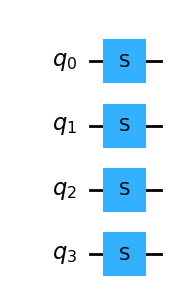

In [7]:
# physical circuit
qc = construct_circuit(physical_circuits[0], n)
qc.draw(output='mpl')

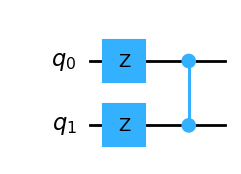

In [8]:
# logical circuit
qc = construct_circuit(logical_circuits[0], k)
qc.draw(output='mpl')

### Logical gate 2

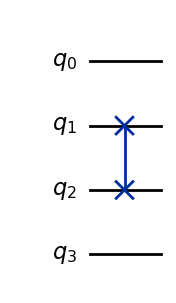

In [9]:
# physical circuit
qc = construct_circuit(physical_circuits[1], n)
qc.draw(output='mpl')

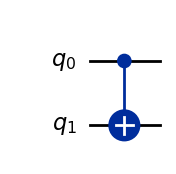

In [10]:
# logical circuit
qc = construct_circuit(logical_circuits[1], k)
qc.draw(output='mpl')

### Logical gate 3

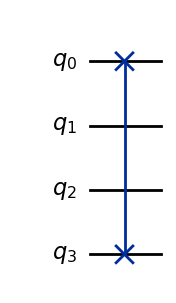

In [11]:
# physical circuit
qc = construct_circuit(physical_circuits[2], n)
qc.draw(output='mpl')

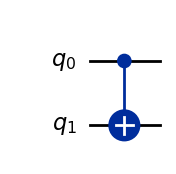

In [12]:
# logical circuit
qc = construct_circuit(logical_circuits[2], k)
qc.draw(output='mpl')

### Logical gate 4

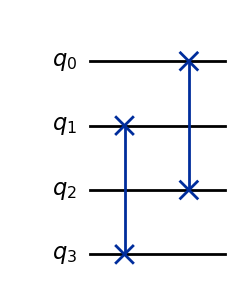

In [13]:
# physical circuit
qc = construct_circuit(physical_circuits[3], n)
qc.draw(output='mpl')

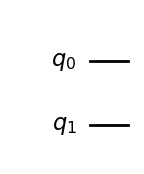

In [14]:
# logical circuit
qc = construct_circuit(logical_circuits[3], k)
qc.draw(output='mpl')

### Logical gate 5

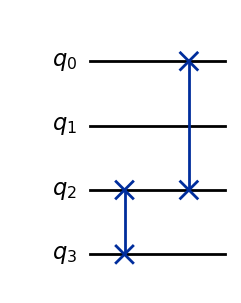

In [15]:
# physical circuit
qc = construct_circuit(physical_circuits[4], n)
qc.draw(output='mpl')

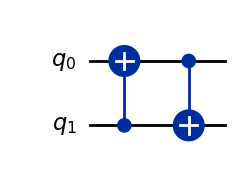

In [16]:
# logical circuit
qc = construct_circuit(logical_circuits[4], k)
qc.draw(output='mpl')

## Logical gate 6

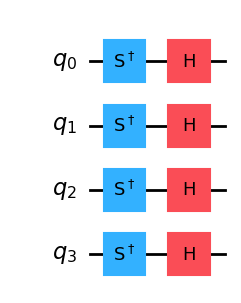

In [17]:
# physical circuit
qc = construct_circuit(physical_circuits[5], n)
qc.draw(output='mpl')

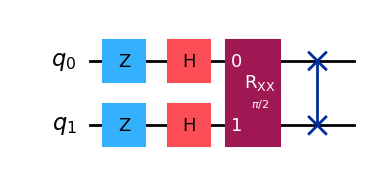

In [18]:
# logical circuit
qc = construct_circuit(logical_circuits[5], k)
qc.draw(output='mpl')